# STA 220 Data & Web Technologies for Data Analysis

### Lecture 3, 1/14/25, APIs


### Announcements

- HW 1 is on Piazza. 
- Class size cannot be increased

### Last week's topics

- Python Recap
    - Memory handling
    - Concurrency

### Today's topics

- Getting Data from the Web
- Hypertext Transfer Protocol
- Representational State Transfer
- iTunes API
- Caching
- API Keys
- Guardian API

### Resources
 - [iTunes Search API](https://affiliate.itunes.apple.com/resources/documentation/itunes-store-web-service-search-api/)
 - [Guardian API](https://open-platform.theguardian.com/documentation/)

### Getting Data from the Web

We consider three ways one can get data from the web, from most to least convenient:
1. Direct download
2. API
3. Scraping

Always look for a direct download first!

##### Difference between web scraping and API

_Web Scraping_ refers to the process of extracting data from a website or specific webpage.

API stands for _application programming interface_ (API) is a collection of functions and data structures for communicating with other software. For instance, whenever you use a Python package, you're using the API created by the package's developers.

The goal of both web scraping and (web) APIs is to access web data.

Web scraping allows you to extract data from any website through the use of web scraping software. On the other hand, APIs give you direct access to the data you want.

Websites sometimes provide an API so that programmers can access content without web scraping. 

### Hypertext Transfer Protocol

The hypertext transfer protocol (HTTP) is a set of rules for communicating over the internet.

For example, your web browser uses HTTP every time you visit a web page. The browser makes a _request_ to the server for the page, and if nothing goes wrong, the server _responds_ with the page. If you have Firefox or Chrome, you can inspect these requests with your browser's web developer tools (Windows: <kbd>Ctrl</kbd> + <kbd>i</kbd>; MacOS: <kbd>&#8984;</kbd> + <kbd>&#8997;</kbd> + <kbd>i</kbd>).

Several [different kinds of HTTP requests](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol#Request_methods) are possible. Think of these as the different "verbs" you can use when communicating in HTTP.

Many protocols exist for communicating over the internet. For instance, you may have heard of _file transfer protocol_ (FTP) for transferring files, or _simple mail transfer protocol_ (SMTP) for sending/receiving email. However, web APIs almost always use HTTP.

A response to an HTTP request always includes a status code that summarizes whether the request was successful. Wikipedia has a full [list of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes). Generally,

* 200-299: Your request succeeded.
* 300-399: You need to take further action to complete the request.
* 400-499: Your request wasn't valid (you made a mistake). You've probably seen 404 before!
* 500-599: Your request failed (the server made a mistake).

### Representational State Transfer 

The most popular kind of web API is a _representational state transfer_ (REST) API. The API needs to meet the following architectural requirements to be considered a REST API:

- Client-server: REST applications have a server that manages application data and state. 
- Stateless: Servers don’t maintain client state, clients manage their own application state. The client’s requests to the server contain all the information required to process them.
- Cacheable: servers must mark their responses as cacheable or not. Systems and clients can cache responses when convenient to improve performance. 
- Uniform interface: This is REST’s most well-known feature or rule. 

The URL with which we can talk to the server is sometimes called *endpoint*. 

### iTunes API

We use the iTunes API at `https://itunes.apple.com/search`, see [documentation](https://developer.apple.com/library/archive/documentation/AudioVideo/Conceptual/iTuneSearchAPI/Searching.html#//apple_ref/doc/uid/TP40017632-CH5-SW1). 

When you first use a web API, check the documentation to find out what the endpoints are and what kind of HTTP requests to use. If the documentation doesn't mention what kind of HTTP request to use, then GET is usually the right choice.

#### Making Requests

Python's `requests` package provides functions for making HTTP requests. Let's use the endpoint we learned from the iTunes API.

In [1]:
import requests

The syntax for the `requests` package is `response = requests.get("WEBSITE ADDRESS")`. 

#### Query Strings

Most of the functions we use have parameters, and you can pass arguments for those parameters when you call a function.

Endpoints in REST APIs work the same way, but the syntax is different. You can pass arguments by adding `?PARAMETER=ARGUMENT` to the end of the URL. Parameter and argument pairs are separated by `&`. This syntax is called a _query string_.

The search endpoint is `https://itunes.apple.com/search`, and the documentation lists several parameters. We can use `requests` to build the query string automatically.

Lets answer the question: How many albums of *Elvis* are on iTunes? 

In [52]:
r = requests.get("https://itunes.apple.com/search", params = {
        "term": "elvis", # add multiple terms via +
        "media": "music",
        "entity": "album",
        "limit": "200"
    })

In [53]:
type(r)

requests.models.Response

In [54]:
r.raise_for_status()

In [55]:
r.json()

{'resultCount': 83,
 'results': [{'wrapperType': 'collection',
   'collectionType': 'Album',
   'artistId': 197443,
   'collectionId': 217633715,
   'amgArtistId': 5175,
   'artistName': 'Elvis Presley',
   'collectionName': 'The Essential Elvis Presley',
   'collectionCensoredName': 'The Essential Elvis Presley',
   'artistViewUrl': 'https://music.apple.com/us/artist/elvis-presley/197443?uo=4',
   'collectionViewUrl': 'https://music.apple.com/us/album/the-essential-elvis-presley/217633715?uo=4',
   'artworkUrl60': 'https://is1-ssl.mzstatic.com/image/thumb/Music125/v4/cb/5d/f5/cb5df548-c55a-e28e-dce9-bd91711f1e84/828768904824.jpg/60x60bb.jpg',
   'artworkUrl100': 'https://is1-ssl.mzstatic.com/image/thumb/Music125/v4/cb/5d/f5/cb5df548-c55a-e28e-dce9-bd91711f1e84/828768904824.jpg/100x100bb.jpg',
   'collectionPrice': 14.99,
   'collectionExplicitness': 'notExplicit',
   'trackCount': 40,
   'copyright': '℗ 2007 Sony Music Entertainment',
   'country': 'USA',
   'currency': 'USD',
   'rel

You can have `requests` check the status for you with the `.raise_for_status()` method.

In [17]:
r.url

'https://itunes.apple.com/search?term=elvis'

In [ ]:
response = requests.get("https://itunes.apple.com/search", params = {
        "term": "beyonce", 
        "media": "music",
        "entity": "album",
        "attribute": "artistTerm", # artistsTerm is no valid attribute! 
        "country": "US", 
        "limit": "200"
    })

Once you have the response, now what? Where's the data? Different web APIs use different formats. Again, see the documentation. Two common formats are:

 - _JavaScript Object Notation_ (JSON): JSON looks and works a lot like Python lists and dictionaries. Lists are surrounded with `[ ]`, and dictionaries are surrounded with `{ }`. There are many Python libraries for reading JSON into lists and dictionaries. Jupyter notebooks are an example of a file in JSON format.

 - _eXtensible Markup Language_ (XML): XML uses "tags" denoted by `< >` to mark up sections of text. We'll learn more about XML when we learn about web scraping, since XML is very similar to hypertext markup language (HTML), the language used to build web pages.

The iTunes returns data in JSON format (derived from JavaScript). We can inspect the raw content (bytes) of a response with the `.content` attribute. If we know the response is in a text format, we can use `.text` to see the content as an ordinary Python string.

In [19]:
r.text

'\n\n\n{\n "resultCount":59,\n "results": [\n{"wrapperType":"track", "kind":"feature-movie", "collectionId":1642366350, "trackId":1625859236, "artistName":"Baz Luhrmann", "collectionName":"Elvis/The Great Gatsby 2 Film Collection", "trackName":"Elvis", "collectionCensoredName":"Elvis/The Great Gatsby 2 Film Collection", "trackCensoredName":"Elvis", "collectionArtistId":199257486, "collectionArtistViewUrl":"https://itunes.apple.com/us/artist/warner-bros-entertainment-inc/199257486?uo=4", "collectionViewUrl":"https://itunes.apple.com/us/movie/elvis/id1625859236?uo=4", "trackViewUrl":"https://itunes.apple.com/us/movie/elvis/id1625859236?uo=4", \n"previewUrl":"https://video-ssl.itunes.apple.com/itunes-assets/Video112/v4/c4/0f/3b/c40f3b20-5604-0049-bced-6596b8180f6e/mzvf_12832432154191125.640x354.h264lc.U.p.m4v", "artworkUrl30":"https://is1-ssl.mzstatic.com/image/thumb/Video112/v4/f9/21/18/f9211832-7fd1-6466-7879-53a07343b487/pr_source.lsr/30x30bb.jpg", "artworkUrl60":"https://is1-ssl.mzsta

Since the response we got is in JSON format, we'd like to convert the string to lists and dictionaries. The `requests` package provides a method `.json()` to do this.

In [56]:
result = r.json()
result

{'resultCount': 83,
 'results': [{'wrapperType': 'collection',
   'collectionType': 'Album',
   'artistId': 197443,
   'collectionId': 217633715,
   'amgArtistId': 5175,
   'artistName': 'Elvis Presley',
   'collectionName': 'The Essential Elvis Presley',
   'collectionCensoredName': 'The Essential Elvis Presley',
   'artistViewUrl': 'https://music.apple.com/us/artist/elvis-presley/197443?uo=4',
   'collectionViewUrl': 'https://music.apple.com/us/album/the-essential-elvis-presley/217633715?uo=4',
   'artworkUrl60': 'https://is1-ssl.mzstatic.com/image/thumb/Music125/v4/cb/5d/f5/cb5df548-c55a-e28e-dce9-bd91711f1e84/828768904824.jpg/60x60bb.jpg',
   'artworkUrl100': 'https://is1-ssl.mzstatic.com/image/thumb/Music125/v4/cb/5d/f5/cb5df548-c55a-e28e-dce9-bd91711f1e84/828768904824.jpg/100x100bb.jpg',
   'collectionPrice': 14.99,
   'collectionExplicitness': 'notExplicit',
   'trackCount': 40,
   'copyright': '℗ 2007 Sony Music Entertainment',
   'country': 'USA',
   'currency': 'USD',
   'rel

In [57]:
type(result)

dict

In [58]:
result["results"][0]

{'wrapperType': 'collection',
 'collectionType': 'Album',
 'artistId': 197443,
 'collectionId': 217633715,
 'amgArtistId': 5175,
 'artistName': 'Elvis Presley',
 'collectionName': 'The Essential Elvis Presley',
 'collectionCensoredName': 'The Essential Elvis Presley',
 'artistViewUrl': 'https://music.apple.com/us/artist/elvis-presley/197443?uo=4',
 'collectionViewUrl': 'https://music.apple.com/us/album/the-essential-elvis-presley/217633715?uo=4',
 'artworkUrl60': 'https://is1-ssl.mzstatic.com/image/thumb/Music125/v4/cb/5d/f5/cb5df548-c55a-e28e-dce9-bd91711f1e84/828768904824.jpg/60x60bb.jpg',
 'artworkUrl100': 'https://is1-ssl.mzstatic.com/image/thumb/Music125/v4/cb/5d/f5/cb5df548-c55a-e28e-dce9-bd91711f1e84/828768904824.jpg/100x100bb.jpg',
 'collectionPrice': 14.99,
 'collectionExplicitness': 'notExplicit',
 'trackCount': 40,
 'copyright': '℗ 2007 Sony Music Entertainment',
 'country': 'USA',
 'currency': 'USD',
 'releaseDate': '2007-01-02T08:00:00Z',
 'primaryGenreName': 'Rock'}

In [59]:
import pandas as pd
results = pd.DataFrame(result['results'])
results

,wrapperType,collectionType,artistId,collectionId,amgArtistId,artistName,collectionName,collectionCensoredName,artistViewUrl,collectionViewUrl,...,artworkUrl100,collectionPrice,collectionExplicitness,trackCount,copyright,country,currency,releaseDate,primaryGenreName,contentAdvisoryRating
0,collection,Album,197443,217633715,5175.0,Elvis Presley,The Essential Elvis Presley,The Essential Elvis Presley,https://music.apple.com/us/artist/elvis-presle...,https://music.apple.com/us/album/the-essential...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,14.99,notExplicit,40,℗ 2007 Sony Music Entertainment,USA,USD,2007-01-02T08:00:00Z,Rock,NaN
1,collection,Album,197443,388127843,5175.0,Elvis Presley,Elv1s: 30 #1 Hits,Elv1s: 30 #1 Hits,https://music.apple.com/us/artist/elvis-presle...,https://music.apple.com/us/album/elv1s-30-1-hi...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,12.99,notExplicit,31,℗ This Compilation (P) 2002 Sony Music Enterta...,USA,USD,2002-09-24T07:00:00Z,Rock,NaN
2,collection,Album,197443,402043658,5175.0,Elvis Presley,Peace In the Valley: The Complete Gospel Recor...,Peace In the Valley: The Complete Gospel Recor...,https://music.apple.com/us/artist/elvis-presle...,https://music.apple.com/us/album/peace-in-the-...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,19.99,notExplicit,87,℗ 1999 Sony Music Entertainment,USA,USD,2000-09-12T07:00:00Z,Christian,NaN
3,collection,Album,197443,563624878,5175.0,Elvis Presley,The Classic Christmas Album,The Classic Christmas Album,https://music.apple.com/us/artist/elvis-presle...,https://music.apple.com/us/album/the-classic-c...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,9.99,notExplicit,17,℗ 2012 Sony Music Entertainment,USA,USD,2012-10-02T07:00:00Z,Christmas: Pop,NaN
4,collection,Album,197443,257540283,5175.0,Elvis Presley,Walk a Mile in My Shoes: The Essential '70s Ma...,Walk a Mile in My Shoes: The Essential '70s Ma...,https://music.apple.com/us/artist/elvis-presle...,https://music.apple.com/us/album/walk-a-mile-i...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,29.99,notExplicit,120,℗ 1995 Sony Music Entertainment,USA,USD,1995-10-10T07:00:00Z,Pop,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,collection,Album,197443,674507376,5175.0,Elvis Presley,"50,000,000 Elvis Fans Can't Be Wrong: Elvis' G...","50,000,000 Elvis Fans Can't Be Wrong: Elvis' G...",https://music.apple.com/us/artist/elvis-presle...,https://music.apple.com/us/album/50-000-000-el...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,9.99,notExplicit,10,℗ 1959 Sony Music Entertainment,USA,USD,1959-11-13T08:00:00Z,Rock,NaN
79,collection,Album,197443,671019268,5175.0,Elvis Presley,For LP Fans Only,For LP Fans Only,https://music.apple.com/us/artist/elvis-presle...,https://music.apple.com/us/album/for-lp-fans-o...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,9.99,notExplicit,12,℗ 1959 Sony Music Entertainment,USA,USD,1959-02-06T08:00:00Z,Rock,NaN
80,collection,Album,197443,356411307,5175.0,Elvis Presley,Double Trouble (Original Soundtrack),Double Trouble (Original Soundtrack),https://music.apple.com/us/artist/elvis-presle...,https://music.apple.com/us/album/double-troubl...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,9.99,notExplicit,12,℗ 1967 Sony Music Entertainment,USA,USD,1967-06-01T07:00:00Z,Soundtrack,NaN
81,collection,Album,197443,1051056986,5175.0,Elvis Presley,C'mon Everybody,C'mon Everybody,https://music.apple.com/us/artist/elvis-presle...,https://music.apple.com/us/album/cmon-everybod...,...,https://is1-ssl.mzstatic.com/image/thumb/Music...,8.99,notExplicit,10,℗ 1971 Sony Music Entertainment,USA,USD,1971-07-01T07:00:00Z,Rock,NaN


In [60]:
results.shape

(83, 21)

### Caching

Making an HTTP request is not free! It has a real cost in CPU time and also cash. Server administrators will not appreciate it if you make too many requests or make requests too quickly. So:

* Use `time.sleep()` to slow down any requests you make in a loop. Aim for no more than 20-30 requests per second.
* Install and use the `requests_cache` package to avoid downloading extra data when you make the same request twice.

Failing to be polite can get you banned from websites!

We can use `sleep` from `time` to suspend any operation for the passed number of seconds. 

In [64]:
import time 
print(time.ctime())
time.sleep(0.05)
print(time.ctime())

Tue Jan 14 09:54:18 2025
Tue Jan 14 09:54:18 2025


A possible problem for time consuming requests is that data is requested multiple times. This can be avoided by using a cache. When the request is made, it first checks the cache. Only if the data is not found there, the data is pulled from the server and copied into the cache. 

We cache our search results with `requests_cache` ([docs](https://requests-cache.readthedocs.io/en/v0.9.6/user_guide.html)). 

In [65]:
import requests
session = requests.Session() 
print(time.ctime())
for i in range(10):
    session.get('http://httpbin.org/delay/1') # this endpoints delays by one second
print(time.ctime())

Tue Jan 14 09:55:10 2025
Tue Jan 14 09:55:34 2025


In [66]:
import requests_cache
session = requests_cache.CachedSession('demo_cache')
print(time.ctime())
for i in range(10):
    res = session.get('http://httpbin.org/delay/1')
print(time.ctime())

Tue Jan 14 09:56:12 2025
Tue Jan 14 09:56:15 2025


In [67]:
res.text

'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {}, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate, br", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.32.3", \n    "X-Amzn-Trace-Id": "Root=1-6786a53c-586daa5c6d7630ea2be3239e"\n  }, \n  "origin": "168.150.23.166", \n  "url": "http://httpbin.org/delay/1"\n}\n'

### API Keys

Many APIs use a _key_ or _token_ to identify the user. For instance, The Guardian, a British newspaper, provides a [web API](https://open-platform.theguardian.com/) to access their news articles. You need an API key to use their web APIs. You can get one for free [here](https://bonobo.capi.gutools.co.uk/register/developer).

#### Storing API Keys

Your API key is private and your responsibility. Treat it like a password. Keep it secret! 

In order to keep your API key separate from your code:
1. Save the API key in a text file.
2. Use Python to load the API key into a variable.

Python's built-in `open()` function opens a file, and the `.readline()` method reads a line from a file. Often you'll see these used with `with`, which automatically closes the file at the end of the block:

In [68]:
def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")

In [70]:
key = read_key("../keys/guardian.txt") # Don't print out your actual API key

In [71]:
type(key)

str

Now you can use the `key` variable anywhere you need the actual API key.

#### Querying The Guardian

We've got our key, so let's use The Guardian API. 

We want to answer the question whether Harris or Trump get more newspaper coverage in the days leading up to the 2024 U.S. presidential election. Let's start by trying to get all of the articles about one of the candidates.

In [85]:
response = requests.get("https://content.guardianapis.com/search", params = {
        "api-key": key,
        "q": "Harris",
        "from-date": "2024-10-20",
        "to-date": "2024-11-5",
        "page-size": 50,
        "order_by": "newest",
        "page": 1
    }) # try page 12

In [86]:
response.raise_for_status()

In [87]:
response.json()

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 579,
  'startIndex': 1,
  'pageSize': 50,
  'currentPage': 1,
  'pages': 12,
  'orderBy': 'relevance',
  'results': [{'id': 'us-news/2024/nov/02/rashida-tlaib-decline-endorsement-kamala-harris',
    'type': 'article',
    'sectionId': 'us-news',
    'sectionName': 'US news',
    'webPublicationDate': '2024-11-02T16:34:38Z',
    'webTitle': 'Michigan congresswoman Rashida Tlaib declines to endorse Kamala Harris',
    'webUrl': 'https://www.theguardian.com/us-news/2024/nov/02/rashida-tlaib-decline-endorsement-kamala-harris',
    'apiUrl': 'https://content.guardianapis.com/us-news/2024/nov/02/rashida-tlaib-decline-endorsement-kamala-harris',
    'isHosted': False,
    'pillarId': 'pillar/news',
    'pillarName': 'News'},
   {'id': 'us-news/2024/oct/30/harris-pennsylvania-battleground-state-election-closing-argument',
    'type': 'article',
    'sectionId': 'us-news',
    'sectionName': 'US news',
    'webPublicationDate':

In [89]:
import time
def get_articles(q, page = 1, from_date = "2024-10-20"):
    time.sleep(0.05) 
    response = requests.get("https://content.guardianapis.com/search", params = {
        "api-key": key,
        "q": q,
        "from-date": from_date,
        "to-date": "2024-11-5",
        "page-size": 50,
        "order_by": "newest", 
        "page": page
    })
    response.raise_for_status()
    return response.json()["response"]

In [90]:
harris = get_articles("Harris")

In [91]:
harris

{'status': 'ok',
 'userTier': 'developer',
 'total': 579,
 'startIndex': 1,
 'pageSize': 50,
 'currentPage': 1,
 'pages': 12,
 'orderBy': 'relevance',
 'results': [{'id': 'us-news/2024/nov/02/rashida-tlaib-decline-endorsement-kamala-harris',
   'type': 'article',
   'sectionId': 'us-news',
   'sectionName': 'US news',
   'webPublicationDate': '2024-11-02T16:34:38Z',
   'webTitle': 'Michigan congresswoman Rashida Tlaib declines to endorse Kamala Harris',
   'webUrl': 'https://www.theguardian.com/us-news/2024/nov/02/rashida-tlaib-decline-endorsement-kamala-harris',
   'apiUrl': 'https://content.guardianapis.com/us-news/2024/nov/02/rashida-tlaib-decline-endorsement-kamala-harris',
   'isHosted': False,
   'pillarId': 'pillar/news',
   'pillarName': 'News'},
  {'id': 'us-news/2024/oct/30/harris-pennsylvania-battleground-state-election-closing-argument',
   'type': 'article',
   'sectionId': 'us-news',
   'sectionName': 'US news',
   'webPublicationDate': '2024-10-30T22:55:46Z',
   'webTitl

In [92]:
pages = harris["pages"]
pages

12

In [93]:
pageSize = harris["total"]
pageSize

579

In [94]:
currentPage = harris["currentPage"]
currentPage

1

In [95]:
results = harris["results"]
for p in range(2, pages + 1):
    results += get_articles("Harris", p)["results"]

In [96]:
results

[{'id': 'us-news/2024/nov/02/rashida-tlaib-decline-endorsement-kamala-harris',
  'type': 'article',
  'sectionId': 'us-news',
  'sectionName': 'US news',
  'webPublicationDate': '2024-11-02T16:34:38Z',
  'webTitle': 'Michigan congresswoman Rashida Tlaib declines to endorse Kamala Harris',
  'webUrl': 'https://www.theguardian.com/us-news/2024/nov/02/rashida-tlaib-decline-endorsement-kamala-harris',
  'apiUrl': 'https://content.guardianapis.com/us-news/2024/nov/02/rashida-tlaib-decline-endorsement-kamala-harris',
  'isHosted': False,
  'pillarId': 'pillar/news',
  'pillarName': 'News'},
 {'id': 'us-news/2024/oct/30/harris-pennsylvania-battleground-state-election-closing-argument',
  'type': 'article',
  'sectionId': 'us-news',
  'sectionName': 'US news',
  'webPublicationDate': '2024-10-30T22:55:46Z',
  'webTitle': 'Harris hits critical battleground Pennsylvania six days before election',
  'webUrl': 'https://www.theguardian.com/us-news/2024/oct/30/harris-pennsylvania-battleground-state-

In [97]:
type(results)

list

In [98]:
df = pd.DataFrame(results)

In [99]:
df.shape

(579, 11)

In [100]:
df.tail()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
574,us-news/2024/nov/02/33-pivotal-us-presidential...,article,us-news,US news,2024-11-02T15:13:31Z,‘There are images no leader ever wants to be s...,https://www.theguardian.com/us-news/2024/nov/0...,https://content.guardianapis.com/us-news/2024/...,False,pillar/news,News
575,world/live/2024/oct/25/israel-lebanon-gaza-ham...,liveblog,world,World news,2024-10-26T02:48:19Z,Blasts reported near Imam Khomeini internation...,https://www.theguardian.com/world/live/2024/oc...,https://content.guardianapis.com/world/live/20...,False,pillar/news,News
576,australia-news/live/2024/nov/01/australia-news...,liveblog,australia-news,Australia news,2024-11-01T07:05:31Z,Family of driver involved in school crash says...,https://www.theguardian.com/australia-news/liv...,https://content.guardianapis.com/australia-new...,False,pillar/news,News
577,australia-news/live/2024/nov/04/australia-poli...,liveblog,australia-news,Australia news,2024-11-04T07:14:38Z,Independent MPs cancel airline VIP memberships...,https://www.theguardian.com/australia-news/liv...,https://content.guardianapis.com/australia-new...,False,pillar/news,News
578,australia-news/live/2024/nov/05/australia-news...,liveblog,australia-news,Australia news,2024-11-05T06:51:18Z,Watt confirms Labor considering releasing seal...,https://www.theguardian.com/australia-news/liv...,https://content.guardianapis.com/australia-new...,False,pillar/news,News


In [101]:
df["webPublicationDate"] = pd.to_datetime(df["webPublicationDate"])

In [102]:
type(df["webPublicationDate"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [103]:
df.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
0,us-news/2024/nov/02/rashida-tlaib-decline-endo...,article,us-news,US news,2024-11-02 16:34:38+00:00,Michigan congresswoman Rashida Tlaib declines ...,https://www.theguardian.com/us-news/2024/nov/0...,https://content.guardianapis.com/us-news/2024/...,False,pillar/news,News
1,us-news/2024/oct/30/harris-pennsylvania-battle...,article,us-news,US news,2024-10-30 22:55:46+00:00,Harris hits critical battleground Pennsylvania...,https://www.theguardian.com/us-news/2024/oct/3...,https://content.guardianapis.com/us-news/2024/...,False,pillar/news,News
2,us-news/2024/oct/30/first-thing-kamala-harris-...,article,us-news,US news,2024-10-30 12:09:33+00:00,First Thing: Kamala Harris calls for ‘new gene...,https://www.theguardian.com/us-news/2024/oct/3...,https://content.guardianapis.com/us-news/2024/...,False,pillar/news,News
3,us-news/live/2024/oct/29/us-elections-trump-pu...,liveblog,us-news,US news,2024-10-30 01:59:25+00:00,Kamala Harris delivers ‘closing argument’ in W...,https://www.theguardian.com/us-news/live/2024/...,https://content.guardianapis.com/us-news/live/...,False,pillar/news,News
4,commentisfree/2024/oct/29/harris-economy-elect...,article,commentisfree,Opinion,2024-10-29 15:00:10+00:00,"To defeat Trump, Harris must talk more about t...",https://www.theguardian.com/commentisfree/2024...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion


In [104]:
date = df["webPublicationDate"].dt
date

In [105]:
date.day_name()

0       Saturday
1      Wednesday
2      Wednesday
3      Wednesday
4        Tuesday
         ...    
574     Saturday
575     Saturday
576       Friday
577       Monday
578      Tuesday
Name: webPublicationDate, Length: 579, dtype: object

In [106]:
dates = pd.DataFrame({"day": date.day, "day_name": date.day_name()})

In [107]:
dates

,day,day_name
0,2,Saturday
1,30,Wednesday
2,30,Wednesday
3,30,Wednesday
4,29,Tuesday
...,...,...
574,2,Saturday
575,26,Saturday
576,1,Friday
577,4,Monday


In [108]:
dates.groupby(["day", "day_name"]).size()

day  day_name 
1    Friday       46
2    Saturday     30
3    Sunday       34
4    Monday       59
5    Tuesday      57
20   Sunday       21
21   Monday       21
22   Tuesday      21
23   Wednesday    33
24   Thursday     29
25   Friday       30
26   Saturday     27
27   Sunday       22
28   Monday       31
29   Tuesday      44
30   Wednesday    43
31   Thursday     31
dtype: int64

Write it as a function

In [109]:
def get_articles(q, page = 1):
    response = requests.get("https://content.guardianapis.com/search", params = {
        "api-key": key,
        "q": q,
        "from-date": "2024-10-20",
        "to-date": "2024-11-5",
        "page-size": 50,
        "page": page
    })
    response.raise_for_status()
    return response.json()["response"]

In [110]:
def get_all_articles(q, time_sleep = 0.05):
    # Get the first page, and find out how many pages there are.
    candidate = get_articles(q)
    pages = candidate["pages"]

    # Loop over remaining pages.
    results = candidate["results"]
    for p in range(2, pages + 1):
        results += get_articles(q, p)["results"]
        time.sleep(time_sleep)

    # Convert the articles to data frame, and the date column to a date.
    df = pd.DataFrame(results)
    df["webPublicationDate"] = pd.to_datetime(df["webPublicationDate"])
    
    # Get the day and day name, then count them.
    date = df["webPublicationDate"].dt
    dates = pd.DataFrame({"day": date.day, "day_name": date.day_name()})
    return dates.groupby(["day", "day_name"]).size()

In [111]:
harris=get_all_articles("Harris")
harris

day  day_name 
1    Friday       46
2    Saturday     29
3    Sunday       32
4    Monday       59
5    Tuesday      50
20   Sunday       22
21   Monday       19
22   Tuesday      22
23   Wednesday    36
24   Thursday     31
25   Friday       29
26   Saturday     30
27   Sunday       25
28   Monday       29
29   Tuesday      44
30   Wednesday    45
31   Thursday     31
dtype: int64

In [112]:
harris.head(10)

day  day_name 
1    Friday       46
2    Saturday     29
3    Sunday       32
4    Monday       59
5    Tuesday      50
20   Sunday       22
21   Monday       19
22   Tuesday      22
23   Wednesday    36
24   Thursday     31
dtype: int64

In [113]:
trump=get_all_articles("Trump")
trump

day  day_name 
1    Friday       49
2    Saturday     43
3    Sunday       36
4    Monday       60
5    Tuesday      53
20   Sunday       18
21   Monday       31
22   Tuesday      38
23   Wednesday    42
24   Thursday     32
25   Friday       38
26   Saturday     30
27   Sunday       25
28   Monday       39
29   Tuesday      53
30   Wednesday    40
31   Thursday     41
dtype: int64

In [114]:
df = pd.DataFrame([harris,trump]).T
df = df.rename(columns={0: 'Harris', 1: 'Trump'})
df = df.reset_index()
df

,day,day_name,Harris,Trump
0,1,Friday,46,49
1,2,Saturday,29,43
2,3,Sunday,32,36
3,4,Monday,59,60
4,5,Tuesday,50,53
5,20,Sunday,22,18
6,21,Monday,19,31
7,22,Tuesday,22,38
8,23,Wednesday,36,42
9,24,Thursday,31,32


In [115]:
df = df.melt(id_vars = ['day', 'day_name'])
df

,day,day_name,variable,value
0,1,Friday,Harris,46
1,2,Saturday,Harris,29
2,3,Sunday,Harris,32
3,4,Monday,Harris,59
4,5,Tuesday,Harris,50
5,20,Sunday,Harris,22
6,21,Monday,Harris,19
7,22,Tuesday,Harris,22
8,23,Wednesday,Harris,36
9,24,Thursday,Harris,31


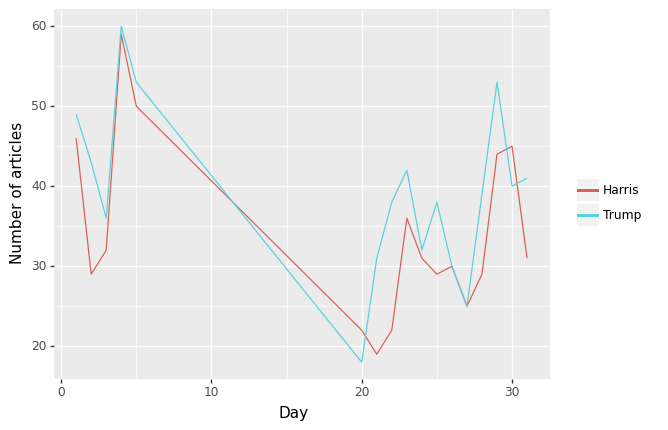

<ggplot: (8784802543885)>

In [116]:
import plotnine as p9
(
    p9.ggplot(df, p9.aes(x='day',y='value',color='variable')) + 
        p9.geom_line() + 
    p9.labs(color='',x='Day',y='Number of articles')
)

What are some ways this analysis could be improved?

* Check that articles about "Trump" and "Harris" are actually about the two candidates. Some may be about other things -- the English word "trump", ...
* Check whether the API searches article text or just article titles.
* Use more sources, and use American newspapers (unless the goal was to analyze international news).
* Make visualizations.
* Use a larger time window.
* Use other kinds of data (e.g., poll results) to look for relationships.

Collecting and cleaning data takes a lot of very technical work, but it's only the first step in the analysis. When you finish data collection and cleaning, it can feel like you're finally done. Take a moment to congratulate yourself and step away from the data, so that when you come back you'll be ready to do a careful statistical analysis.

### OAuth

[OAuth](https://en.wikipedia.org/wiki/OAuth) is a way to give an application access to data on a website or web API.

You might run into OAuth if you use a web API where the data is private. For instance, Twitter provides a [web API](https://developer.twitter.com/en/docs.html) for managing your personal Twitter account. If you want to access the API from a Python script, first you have to use OAuth to tell Twitter that the script has permission to use your data.

OAuth can operate in several different ways. As always, check the documentation for the web API you want to use in order to find out what you need to do.

The simplest case of OAuth requires scripts to have a key or token from the web API provider. This is very similar to using an API key.

For more complicated cases, the `requests-ouathlib` package ([docs](https://requests-oauthlib.readthedocs.io/en/latest/)) may help.

### Summary 

- Third parties provide access to their data bases via APIs
- Check API documentation to assemble a valid query
- You are a guest, be polite! 